In [16]:
import numpy as np
import pandas as pd
import h5py
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
import matplotlib.pyplot as plt

import tensorflow as tf
#from keras.callbacks import ModelCheckpoint, LearningRateScheduler
#from keras import backend as keras
"""
import torch
import pickle
import os
import skimage.io as io
import skimage.transform as trans

from functions import *
from torch.utils.data import TensorDataset

import os
import json
import torch
import pickle
from train_functions import *
from functions import *
import torch.optim as optim#hf = h5py.File('cavity_data_172_channel1_SDF.h5', 'r')

from torch.utils.data import TensorDataset
from Models.UNetEx import UNetEx
"""

"\nimport torch\nimport pickle\nimport os\nimport skimage.io as io\nimport skimage.transform as trans\n\nfrom functions import *\nfrom torch.utils.data import TensorDataset\n\nimport os\nimport json\nimport torch\nimport pickle\nfrom train_functions import *\nfrom functions import *\nimport torch.optim as optim#hf = h5py.File('cavity_data_172_channel1_SDF.h5', 'r')\n\nfrom torch.utils.data import TensorDataset\nfrom Models.UNetEx import UNetEx\n"

In [4]:
def loss_function_generator(y_pred, y_true):

    total_gen_loss = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    return total_gen_loss

In [19]:

model = tf.keras.models.load_model('checkpoint-layer-3-8-16-32-batch-32-swish_0.9296533465385437',custom_objects={'loss_function_generator': loss_function_generator})

In [20]:
hf = h5py.File('cavity_data_900_shuffle_channel_12.h5', 'r')
hf.keys()
geometry_xy = hf.get('geometry_xy')
data_xy = hf.get('data_xy')

In [21]:
pre_data_xy=np.empty((90,50,50,3), float)
pre_geometry_xy=np.empty((90,50,50,9), float)

pre_data_xy[0:90,:,:,0:1]=data_xy[810:900,:,:,0:1]
pre_data_xy[0:90,:,:,1:2]=data_xy[810:900,:,:,2:3]

pre_geometry_xy[0:90,:,:,0:4]=geometry_xy[810:900,:,:,0:4]
pre_geometry_xy[0:90,:,:,4:6]=geometry_xy[810:900,:,:,5:7]
pre_geometry_xy[0:90,:,:,6:8]=geometry_xy[810:900,:,:,8:10]

In [22]:
val_preds = model.predict(pre_geometry_xy, verbose=1)

3/3 [==============================] - 1s 107ms/step


In [23]:
def visualize_scale(sample_y, out_y,error, s):  
           
    minu = np.min(sample_y[s, :, :, 0])
    maxu = np.max(sample_y[s, :, :, 0])
    
    minv = np.min(sample_y[s, :, :, 1])
    maxv = np.max(sample_y[s, :, :, 1])
    
    #minp = np.min(sample_y[s, :, :, 2])
    #maxp = np.max(sample_y[s, :, :, 2])
    
    minT = np.min(sample_y[s, :, :, 2])
    maxT = np.max(sample_y[s, :, :, 2])
    
    #minp_rgh = np.min(sample_y[s, :, :, 4])
    #maxp_rgh = np.max(sample_y[s, :, :, 4])
    
    mineu = np.min(error[s, 0, :, :])
    maxeu = np.max(error[s, 0, :, :])
   
    minev = np.min(error[s, 1, :, :])
    maxev = np.max(error[s, 1, :, :])
    
  #  minep = np.min(error[s, 2, :, :])
   # maxep = np.max(error[s, 2, :, :])
    
    mineT = np.min(error[s, 2, :, :])
    maxeT = np.max(error[s, 2, :, :])
    
   # minep_rgh = np.min(error[s, 4, :, :])
  #  maxep_rgh = np.max(error[s, 4, :, :])
   
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(9, 10)
    plt.subplot(5, 3, 1)
    plt.title('CFD', fontsize=18)
    plt.imshow(np.transpose(sample_y[s, :, :, 0]), cmap='jet', vmin = minu, vmax = maxu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Ux', fontsize=18)
    plt.subplot(5, 3, 2)
    plt.title('CNN', fontsize=18)
    plt.imshow(np.transpose(out_y[s, :, :, 0]), cmap='jet', vmin = minu, vmax = maxu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 3)
    plt.title('Error', fontsize=18)
    plt.imshow(np.transpose(error[s, :, :, 0]), cmap='jet', vmin = mineu, vmax = maxeu, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')

    plt.subplot(5, 3, 4)
    plt.imshow(np.transpose(sample_y[s, :, :, 1]), cmap='jet', vmin = minv, vmax = maxv, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('Uy', fontsize=18)
    plt.subplot(5, 3, 5)
    plt.imshow(np.transpose(out_y[s, :, :, 1]), cmap='jet', vmin = minv, vmax = maxv, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 6)
    plt.imshow(np.transpose(error[s, :, :, 1]), cmap='jet', vmin = minev, vmax = maxev, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')    
    
    plt.subplot(5, 3, 7)
    plt.imshow(np.transpose(sample_y[s, :, :, 2]), cmap='jet', vmin = minT, vmax = maxT, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('T', fontsize=18)
    plt.subplot(5, 3, 8)
    plt.imshow(np.transpose(out_y[s, :, :, 2]), cmap='jet', vmin = minT, vmax = maxT, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 9)
    plt.imshow(np.transpose(error[s, :, :, 2]), cmap='jet', vmin = mineT, vmax = maxeT, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')    
    plt.tight_layout()
    plt.show()
    
"""
    plt.subplot(5, 3, 7)
    plt.imshow(np.transpose(sample_y[s, :, :, 2]), cmap='jet', vmin = minp, vmax = maxp, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('p', fontsize=18)
    plt.subplot(5, 3, 8)
    plt.imshow(np.transpose(out_y[s, :, :, 2]), cmap='jet', vmin = minp, vmax = maxp, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 9)
    plt.imshow(np.transpose(error[s, :, :, 2]), cmap='jet', vmin = minep, vmax = maxep, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
"""
"""
    plt.subplot(5, 3, 13)
    plt.imshow(np.transpose(sample_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.ylabel('p_rgh', fontsize=18)
    plt.subplot(5, 3, 14)
    plt.imshow(np.transpose(out_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
    plt.subplot(5, 3, 15)
    plt.imshow(np.transpose(error[s, :, :, 4]), cmap='jet', vmin = minep_rgh, vmax = maxep_rgh, origin='lower', extent=[0,1,0,1])
    plt.colorbar(orientation='horizontal')
"""

"\n    plt.subplot(5, 3, 13)\n    plt.imshow(np.transpose(sample_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])\n    plt.colorbar(orientation='horizontal')\n    plt.ylabel('p_rgh', fontsize=18)\n    plt.subplot(5, 3, 14)\n    plt.imshow(np.transpose(out_y[s, :, :, 4]), cmap='jet', vmin = minp_rgh, vmax = maxp_rgh, origin='lower', extent=[0,1,0,1])\n    plt.colorbar(orientation='horizontal')\n    plt.subplot(5, 3, 15)\n    plt.imshow(np.transpose(error[s, :, :, 4]), cmap='jet', vmin = minep_rgh, vmax = maxep_rgh, origin='lower', extent=[0,1,0,1])\n    plt.colorbar(orientation='horizontal')\n"

S =  0


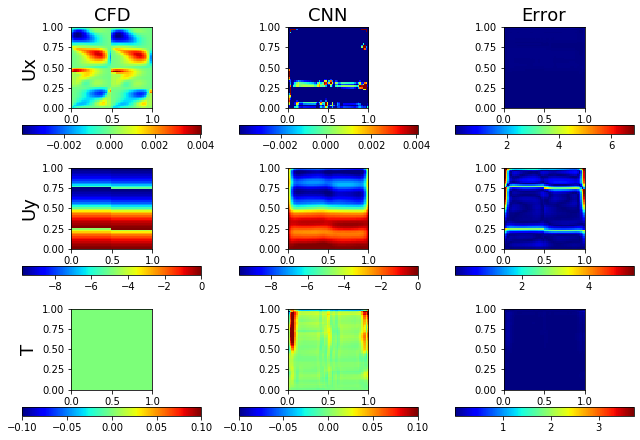

S =  1


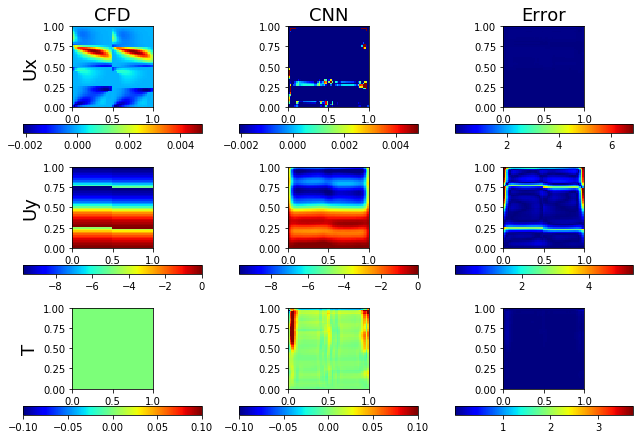

S =  2


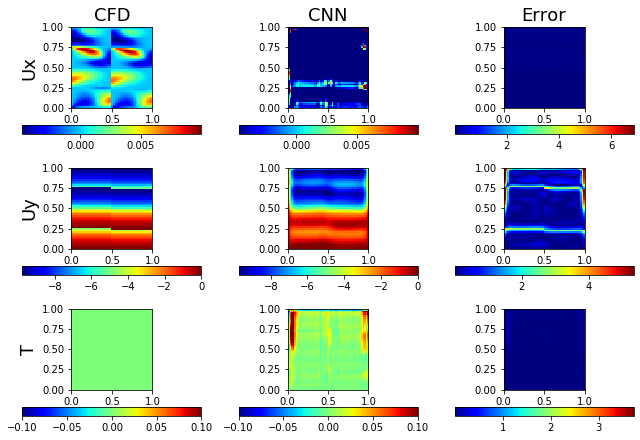

S =  3


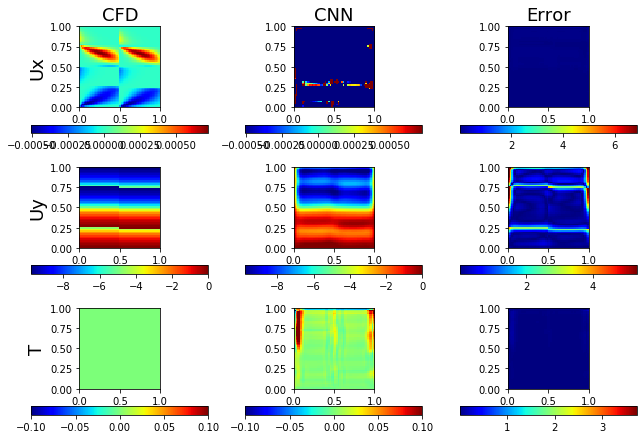

S =  4


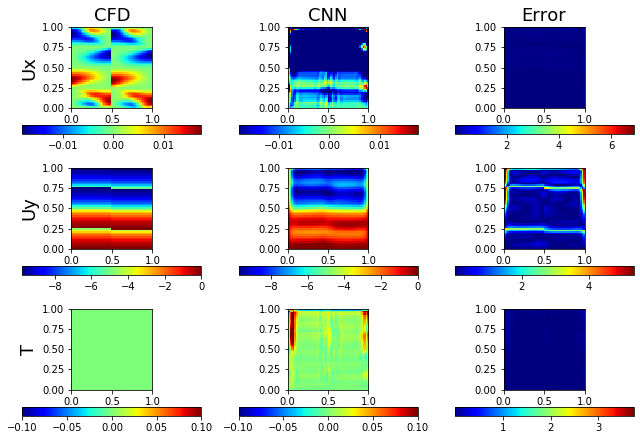

S =  5


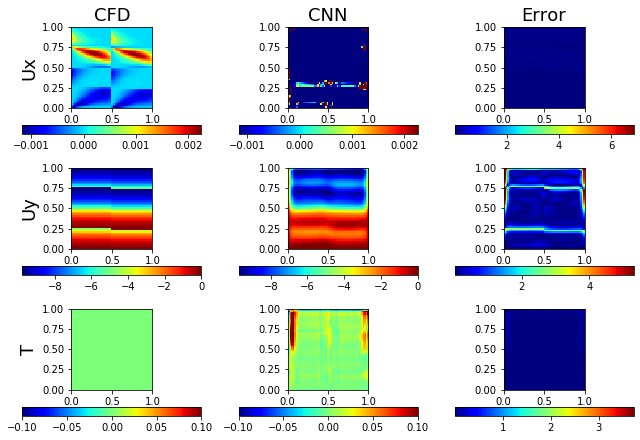

S =  6


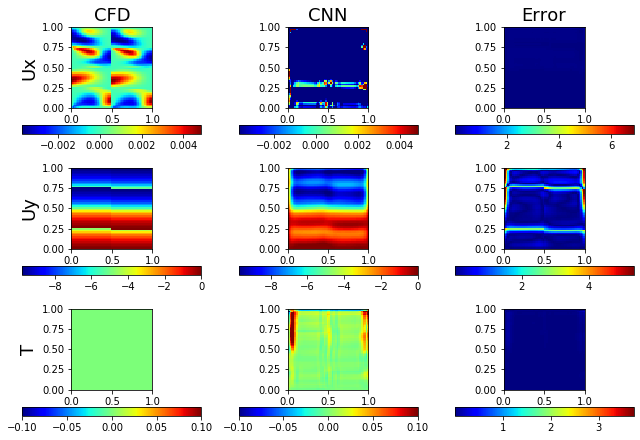

S =  7


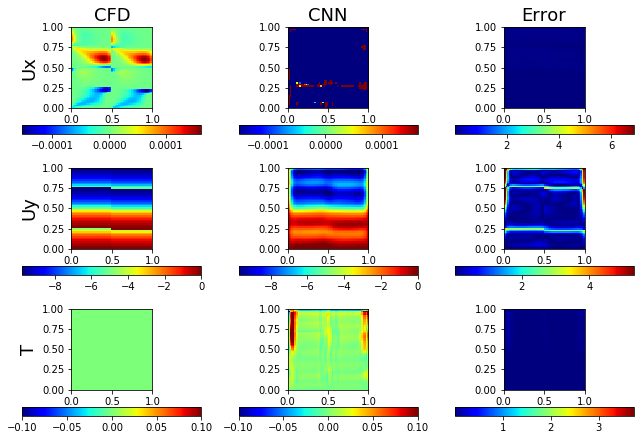

S =  8


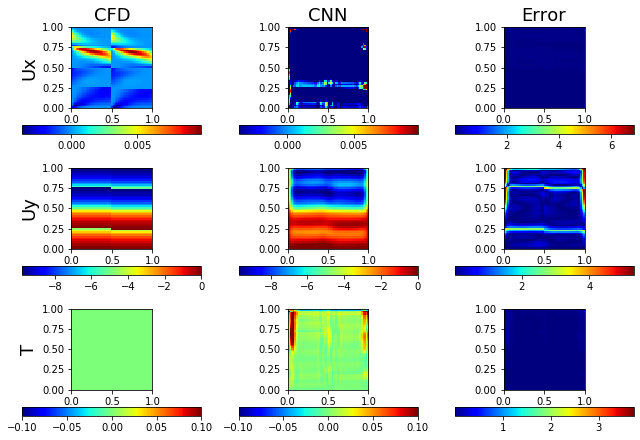

S =  9


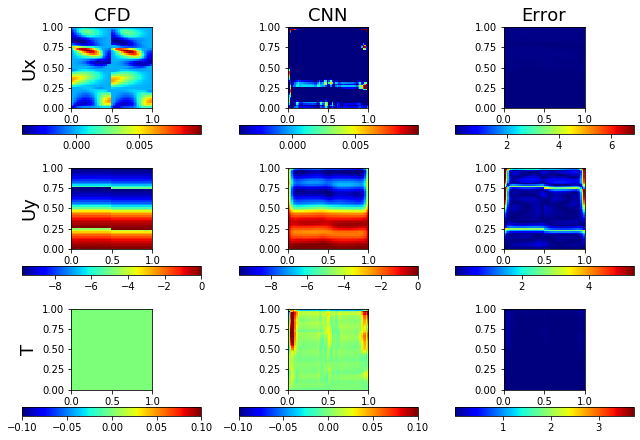

S =  10


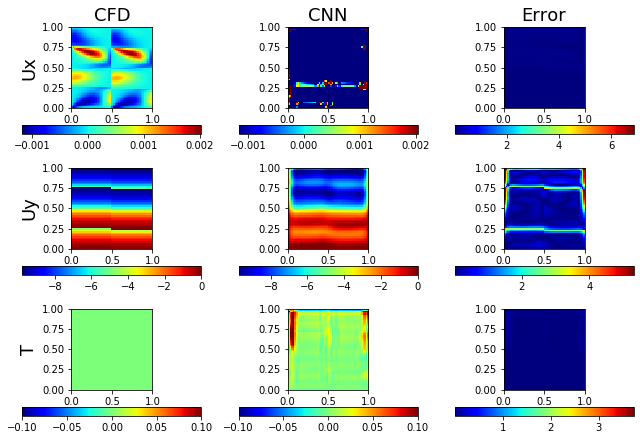

S =  11


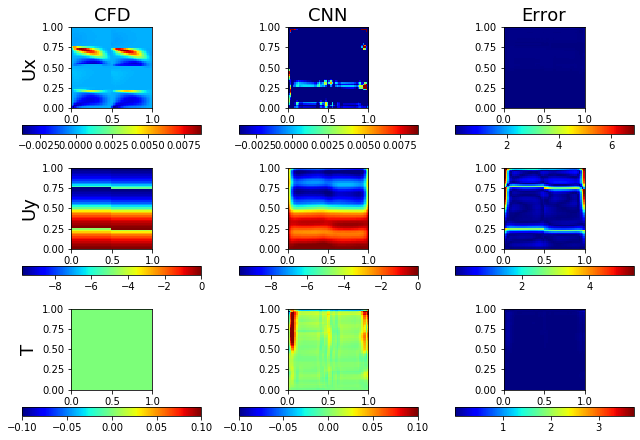

S =  12


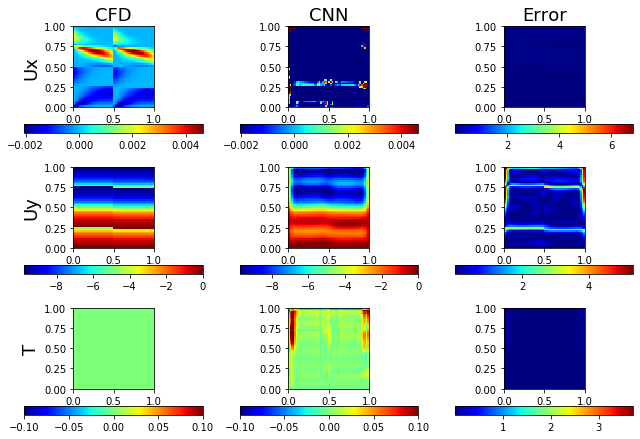

S =  13


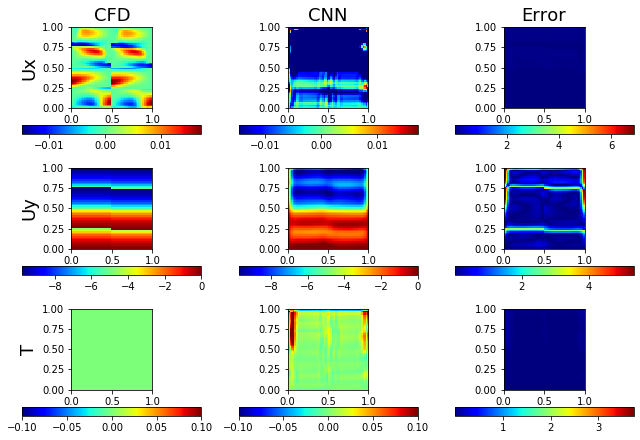

S =  14


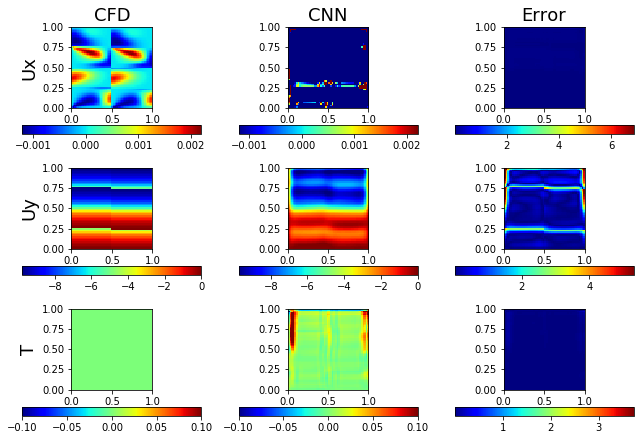

S =  15


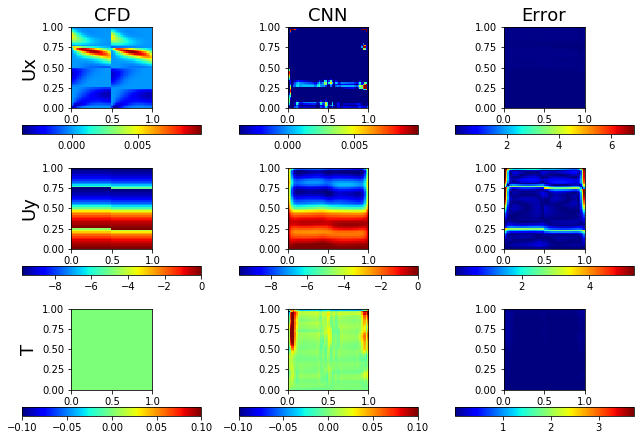

S =  16


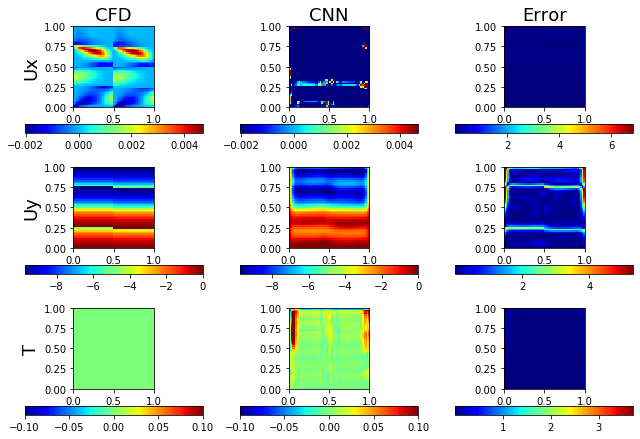

S =  17


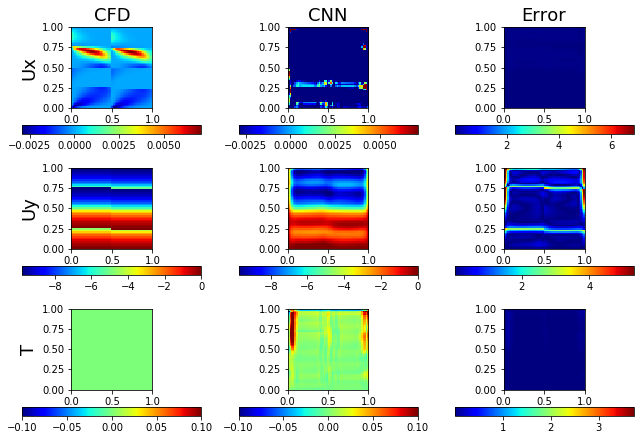

S =  18


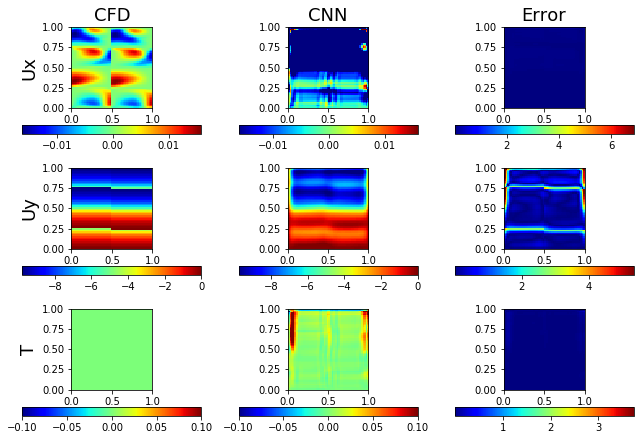

S =  19


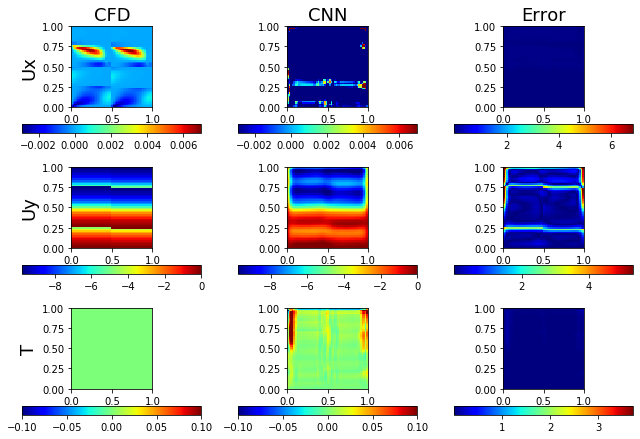

S =  20


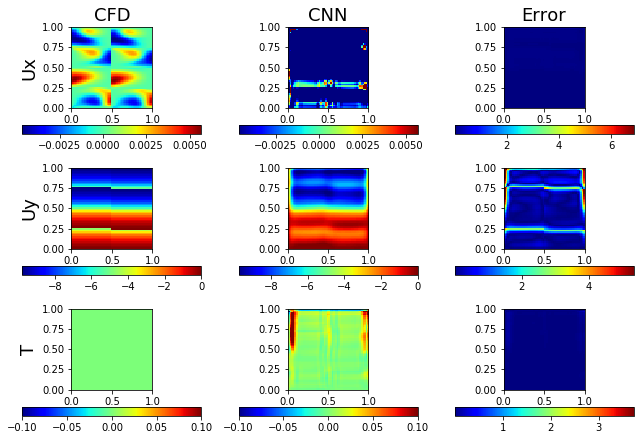

S =  21


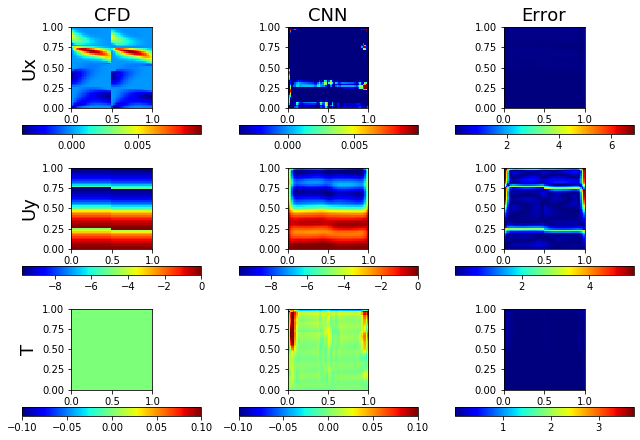

S =  22


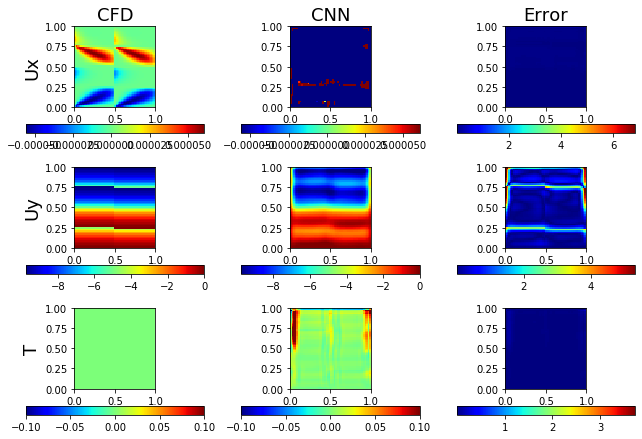

S =  23


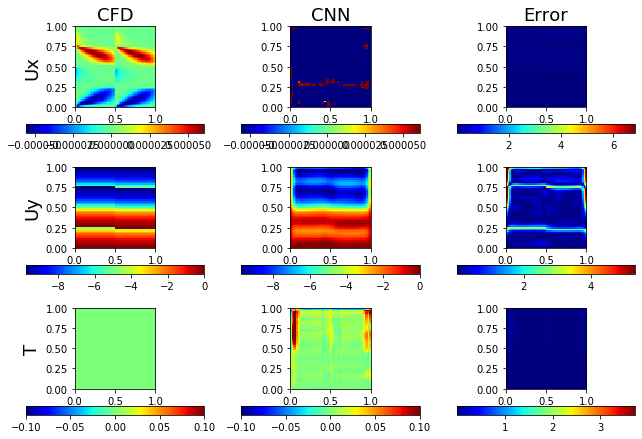

S =  24


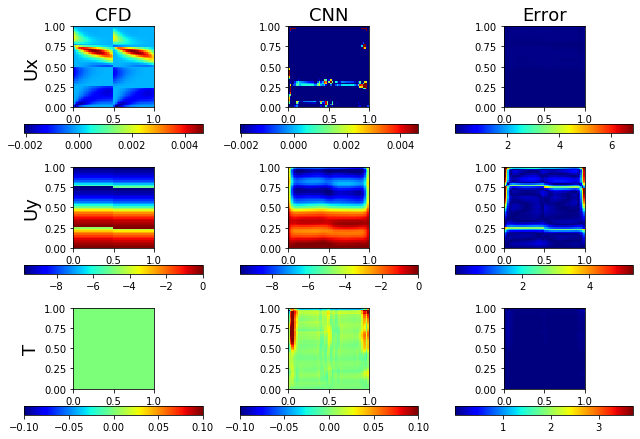

S =  25


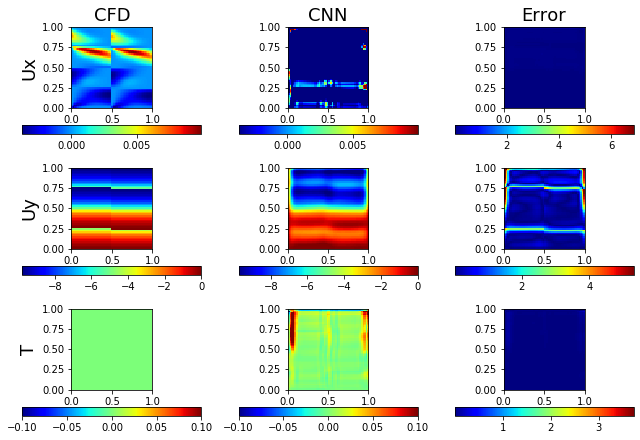

S =  26


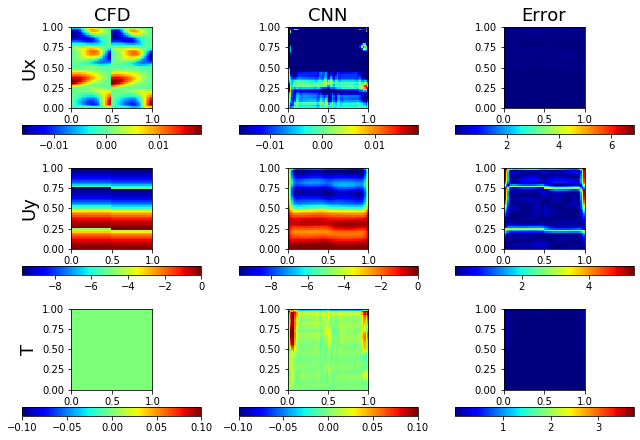

S =  27


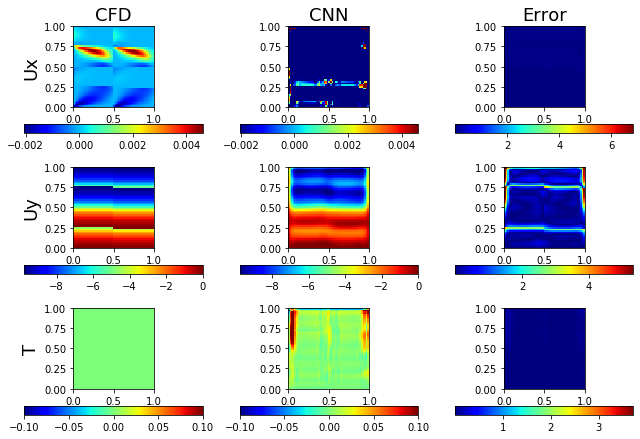

S =  28


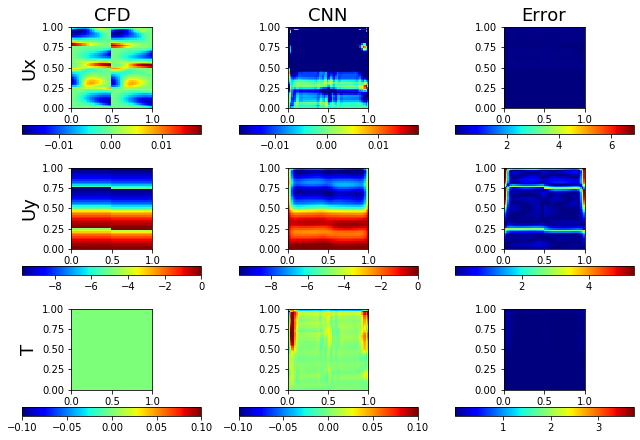

S =  29


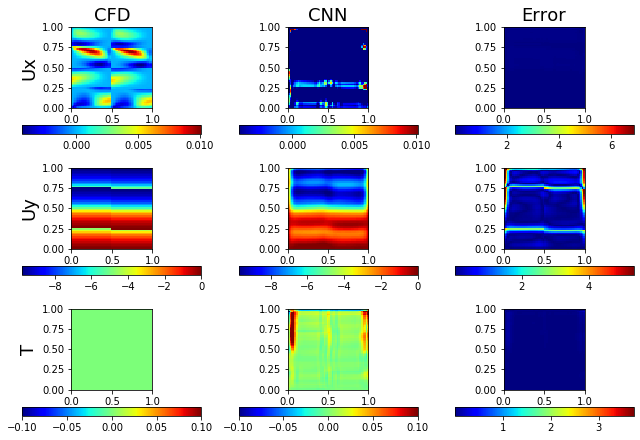

In [24]:
error = abs(pre_data_xy[:30] - val_preds[:30])
for s in range(0,30):
    print("S = ", s)
    visualize_scale(pre_data_xy[:30], val_preds[:30], error[:30], s)